In [1]:
from diffusion.data import load_mnist_dataset
from diffusion.diffusion import PreComputedVariables, plot_forward, plot_sample_image, plot_backwards, backward
from diffusion.model import Unet
from diffusion.training import train
from pathlib import Path
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam

c:\Users\caspe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load model

In [2]:
# Constants
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
T = 300
MODELPATH = Path(".") / "models" / f"T{T}" / "MODEL100.pt"
IMAGESIZE = [1, 28, 28]
BATCH_SIZE = 128
EPOCHS = 100

print(f"Device = {DEVICE}")

# Load data and setup variables
train, test = load_mnist_dataset(Path('.'), download=True)
dataloader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
testloader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
precomputed_variables = PreComputedVariables(T)

# plot_forward(dataloader, precomputed_variables)
model = Unet().to(DEVICE)
model.load_state_dict(torch.load(MODELPATH, map_location=torch.device('cpu')))
model = model.eval()

Device = cpu


# Forward pass

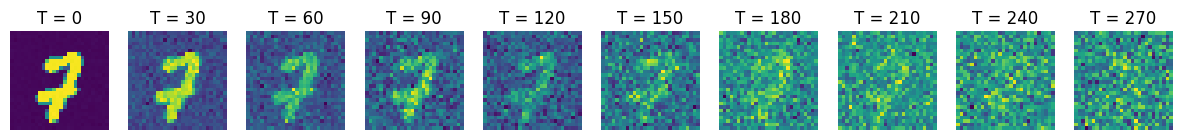

In [3]:
plot_forward(next(iter(dataloader))[0], precomputed_variables)

# Generate samples

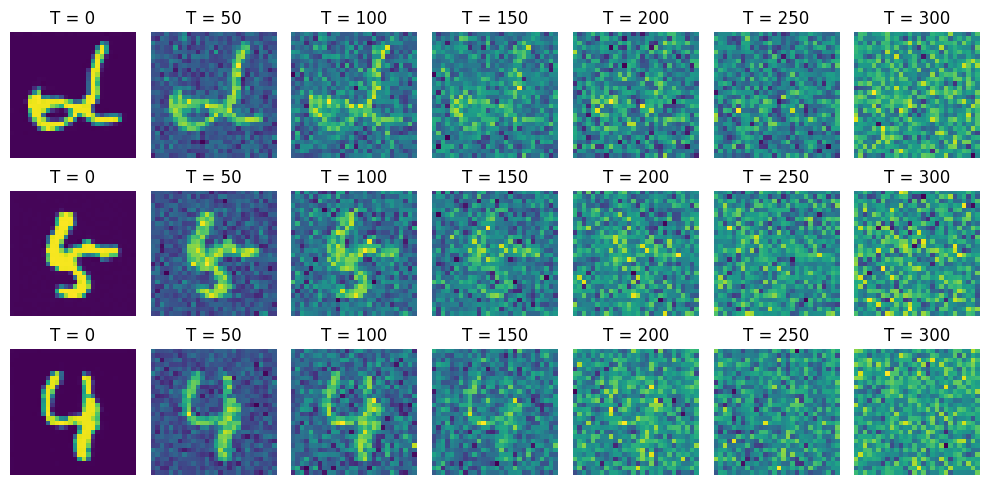

In [4]:
plot_sample_image(model, precomputed_variables, tuple(IMAGESIZE), DEVICE, T, n_samples = 3, plot_t_values = [0, 50, 100, 150, 200, 250, 300], figsize=(10,5))

# Plot grid of results

In [7]:
grid_size = (12, 12)
images = torch.randn((grid_size[0] * grid_size[1], *tuple(IMAGESIZE)), device=DEVICE)
noise_images = images

In [8]:
for i in reversed(range(0, T)):
    t = torch.full((1,), i, device=DEVICE, dtype=torch.long)
    images = precomputed_variables.generate_sample(model, images, t)

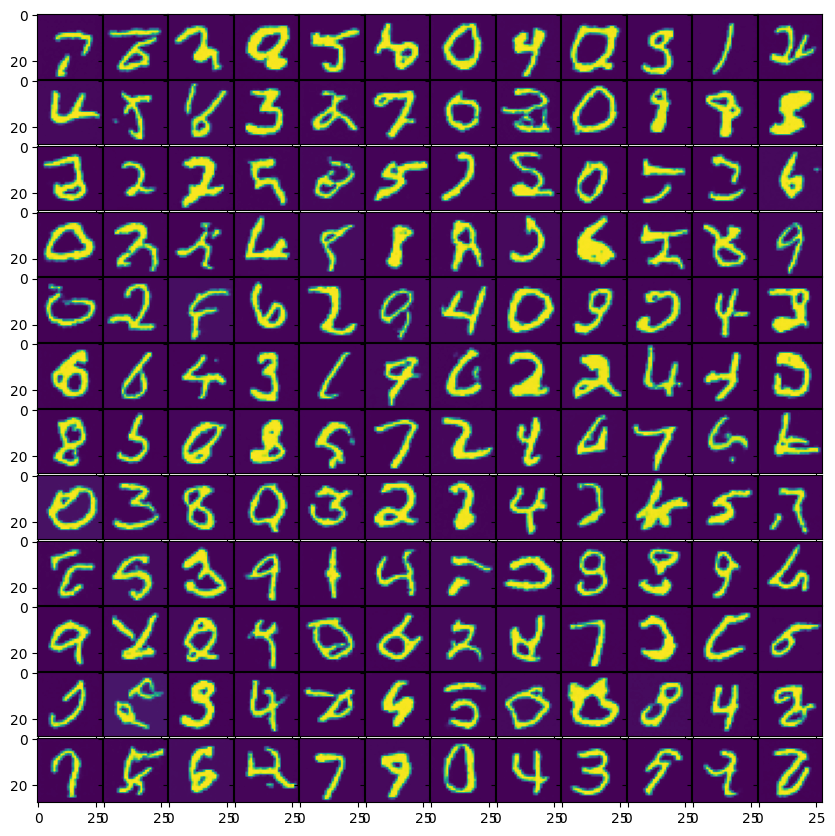

In [9]:
plot_images = images.reshape(*grid_size, IMAGESIZE[1], IMAGESIZE[2])
fig, ax = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(8, 8), sharex = True, sharey = True)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        ax[i,j].imshow(plot_images[i, j].detach().numpy())
slim=0.6
plt.tight_layout(pad=-slim, w_pad=-slim, h_pad=-slim)
plt.show()